# Exploratory Data Analysis Assignment

In this Notebook, I will be performing some data analysis on the 'steps.csv' and 'survey.csv' files, which contain data from 900 volunteers who recorded their daily steps, distance and calories using a FitBit. 

# Data Cleaning

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('steps.csv',sep=';')
df2 = pd.read_csv('survey.csv')

df = pd.merge(df1, df2, on = 'id')

def remove_weight_outliers(x):
    if(x > 160.0 or x < 50.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(remove_weight_outliers)

Above, I have read in both csv files and merged them on the 'id' field. I then removed any extreme outliers of the weight column.

In [118]:
df['Mean Steps'] = df.loc[:,'20-6-2013':'13-5-2014'].mean(axis=1)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,Mean Steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


Here, I calculated the mean number of steps taken per person.

In [119]:
df_mean = df['Mean Steps'].sort_values(ascending = False)
print(df_mean)

740    201722.600000
95      58491.067568
881     43912.307692
205     30373.808917
109     22842.716846
           ...      
616         4.000000
17               NaN
307              NaN
553              NaN
565              NaN
Name: Mean Steps, Length: 929, dtype: float64


In [120]:
def remove_steps_outliers(x):
    if(x > 30000.0): 
        return float('NaN')
    else: 
        return x
df['Mean Steps'] = df['Mean Steps'].apply(remove_steps_outliers)

Inspection of the data revealed some implausible figures, which were replaced with NaN.

# Exploratory data analysis

The median steps taken is: 6235.238095238095
The mean steps taken is: 6675.006096684801


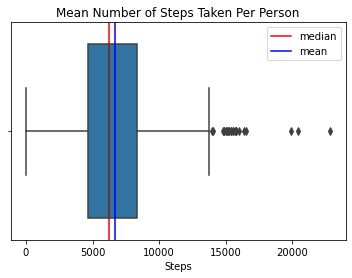

In [122]:
mean_steps = df['Mean Steps'].mean()
median_steps = df['Mean Steps'].median()

print(f'The median steps taken is: {median_steps}')
print(f'The mean steps taken is: {mean_steps}')

sns.boxplot(x=df['Mean Steps'])
plt.title('Mean Number of Steps Taken Per Person')
plt.xlabel('Steps')
plt.axvline(median_steps, 0, 100, color='red', label='median') 
plt.axvline(mean_steps, 0, 100, color='blue', label='mean')
plt.legend()
plt.show()

This distribution is unimodal and right-skewed. Most people averaged between 4,500 and 8,000 steps per day, though there were some outliers, the highest of which averaged ~28,000 steps per day.

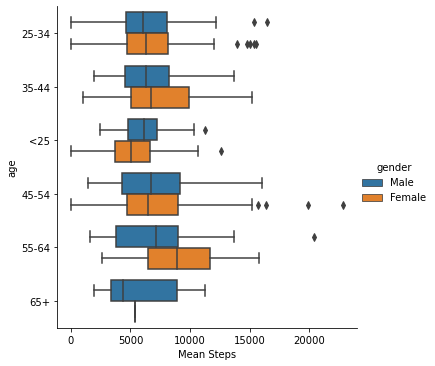

In [123]:
sns.catplot(x='Mean Steps', y='age', data=df, kind="box", hue='gender')

The vast majority of the outliers across all age groups are female. Female participants had higher mean steps taken across all age groups except for the under 25s and 45-54. It must be noted that there were no female participants in the 65+ bracket. This graph shows that female participants were the most active during the time period studied.

### Scatterplot Matrix

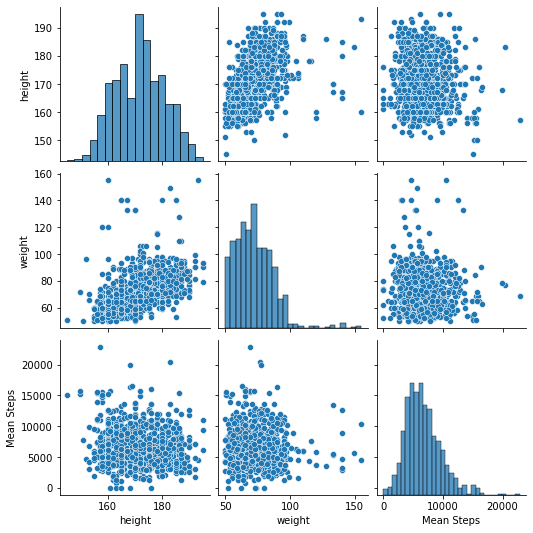

In [124]:
df_subset = df[['height','weight','Mean Steps']]

sns.pairplot(df_subset)
plt.show()

The scatterplots above show that there is a somewhat linear relationship between height and weight but there is no correlation between either height or weight and the mean steps taken.

### Correlation Matrix and Heatmap

              height    weight  Mean Steps
height      1.000000  0.476915   -0.077180
weight      0.476915  1.000000   -0.051823
Mean Steps -0.077180 -0.051823    1.000000


<AxesSubplot:>

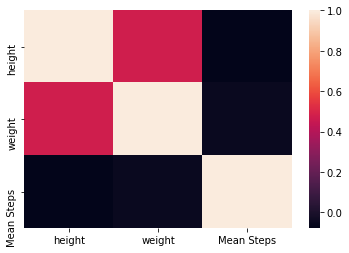

In [125]:
corr = df[['height', 'weight', 'Mean Steps']].corr()
print(corr)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

The correlation matrix and heatmap confirm that there is little to no correlation between either height or weight and the mean steps taken, -.09 and -.05 respectively. They also show that there is some correlation between height and weight, 0.48, though it is not very strong.

Linear regression explanation

In [126]:
import sklearn as sk
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df, columns=['gender', 'age', 'city', 'education_1'])
#df.info()


In [135]:
df['Mean Steps'] = df['Mean Steps'].fillna(0)

I will create and evaluate a predictive model for each of the categorical variables to determine which has the most predictive power for Mean Steps

dummy variable column names: 'gender_Male', 'gender_Female', 'city_Bordeaux', 'city_Lille', 'city_Lyon', 'city_Montpellier', 'education_1_Bachelor',
 'education_1_High school', 'education_1_Master or doctorate', 'education_1_No degree', 'education_1_Primary', 'education_1_Vocational',
 'age_<25', 'age_25-34', 'age_35-44', 'age_45-54', 'age_55-64', 'age_65+'

In [170]:
x = df[['education_1_Bachelor', 'education_1_High school', 'education_1_Master or doctorate', 'education_1_No degree', 'education_1_Primary', 'education_1_Vocational']]
y = df['Mean Steps']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [171]:
lm = LinearRegression()

lm = lm.fit(x_train, y_train)

In [172]:
y_test_p = lm.predict(x_test)

In [161]:
r2_score(y_test, y_test_p)

0.0037975609265439303

gender r2 score: 0.004035307344398498
age r2 score: 0.05395096857170156
city r2 score: -0.03901359348705191
education r2 score: -0.015422629015742428

What these scores tell us is that none of the categorical variables models fit the data well, with age having the highest score of 0.05, meaning that only 5% of the variation in mean steps are explained by the model.

In [173]:
math.sqrt(mean_squared_error(y_test, y_test_p))

2905.1866000033447

gender RMSE score: 3004.872560191341
age RMSE score: 2930.019281048123
city RMSE score: 3102.6183327017566
education RMSE score: 2905.1866000033447

The RMSE scores tell us that using the data from each categorical variable we are usually between ~2900 and ~3100 off in our predictions.

I'm confused as to how to calculate residuals when values are stored in variables not columns - unsure if test/train models can be done using columns not variables